<a href="https://colab.research.google.com/github/madarshb19/RNNs-for-Stock-Price-Predictrion/blob/main/RecurrentNeuralNetworks_(Stock_Price_Predictions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

We implement LSTM model rather than std. RNN Model

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
#we are only importing training set for now
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [ ]:
#It is more relevant to use normalization in RNN's
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1)) #0,1 represents scaled b/w 0 and 1
training_set_scaled = sc.fit_transform(training_set)    #it is recommended to keep the original training set as it is

In [ ]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [ ]:
#60 timesteps means at each time t,rnn will look at 60 days of previous data and will predict the next output.This number must be selected properly to avoid overfitting.Must be experimented with
X_train = [] #training data of 60 previous stock prices
y_train = [] #stock prices of t+1
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
print(X_train)
print(X_train[0].size)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
60


In [ ]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [ ]:
#adding dimensions(indicators) other than google stock prices.(not doing it rn)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #2D TO 3D. 3rd dimension is the indicator. {batch_size(no. of obs.),timesteps,input_dim}

In [ ]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
#initialising rnn as a sequence of layers instead of a computational graph (the latter is done using pytorch)
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
#Dropout regularisation is for preventing overfitting
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1],1))) # 3 arguments : 1)Number of units/neurons in lstm layer 2) return sequences = true for stacked lstm = false(default) for last lstm layer 3) input shape = shape of X_train
regressor.add(Dropout(0.2)) #argument is the dropout rate.recommended = 20%

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50,return_sequences = True)) #no need to specify input shape after 1st layer as it is recognized by the units argument
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error') #for rnn's,rmspop is recommended but adam is fine as well

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train,y_train,epochs = 100,batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 114ms/step - loss: 0.0480
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0038
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0) #horizontal concat = 1,vertical = 0
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values #.values converts this array into np array
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) #sc object was already fitted on the training set
#however,rnn expects a 3d format
X_test = [] #no need of y test because we are only doing predictions
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 64ms/step


### Visualising the results

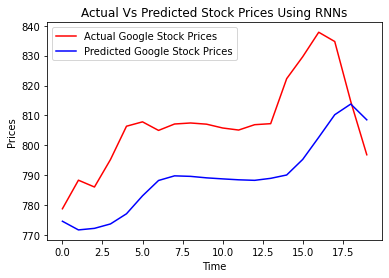

In [ ]:
plt.plot(real_stock_price,color = 'red',label = 'Actual Google Stock Prices')
plt.plot(predicted_stock_price,color = 'blue',label = 'Predicted Google Stock Prices')
plt.title('Actual Vs Predicted Stock Prices Using RNNs')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.show()

RNN model was able to react and predict to smooth changes but not for sudden spikes

In [ ]:
#computing value to MSE for our stock prices
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

21.29048271455586
